# Evaluation: Precision & Recall
## Using the evaluation metrics we have learned, we are going to compare how well some different types of classifiers perform on different evaluation metrics
### We are going to use a dataset of written numbers which we can import from sklearn. Run the code below to do so. 


In [13]:
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.base import BaseEstimator
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas")

### Now take a look at the shapes of the X and y matricies 

In [14]:
# Print the shapes
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (70000, 784)
Shape of y: (70000,)


### Now, let's pick one entry and see what number is written. Use indexing to pick the 36000th digit

In [15]:
# Indexing to pick the 36000th digit
index = 36000

# Get the image data and label
selected_image = X[index]
selected_label = y[index]

print("Label for the selected image:", selected_label)

Label for the selected image: 9


### You can use the .reshape(28,28) function and plt.imshow() function with the parameters cmap = matplotlib.cm.binary, interpolation="nearest" to make a plot of the number. Be sure to import matplotlib!

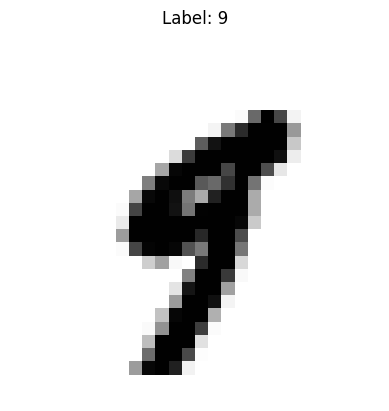

In [16]:
# Get the image data and label
selected_image = X[index].reshape(28, 28)
selected_label = y[index]

# Plotting the selected image
plt.imshow(selected_image, cmap=plt.cm.binary, interpolation="nearest")
plt.title(f"Label: {selected_label}")
plt.axis("off")  # Turn off axis numbers and ticks
plt.show()

### Use indexing to see if what the plot shows matches with the outcome of the 36000th index

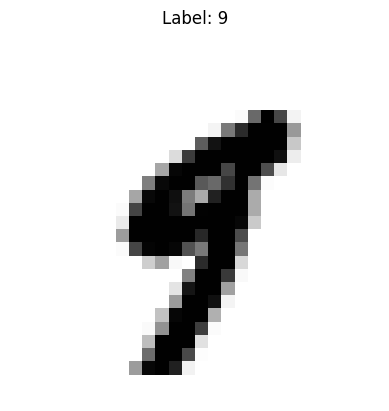

Displayed Label: 9


In [17]:
# Indexing to pick the 36000th digit
index = 36000

# Get the image data and label
selected_image = X[index].reshape(28, 28)
selected_label = y[index]

# Plotting the selected image
plt.imshow(selected_image, cmap=plt.cm.binary, interpolation="nearest")
plt.title(f"Label: {selected_label}")
plt.axis("off")  # Turn off axis numbers and ticks
plt.show()

# Check if the displayed label matches the actual label----> there s a match
print("Displayed Label:", selected_label)

### Now lets break into a test train split to run a classification. Instead of using sklearn, use indexing to select the first 60000 entries for the training, and the rest for training.

In [18]:
# Splitting into train and test sets using indexing
num_train_samples = 60000
X_train = X[:num_train_samples]
y_train = y[:num_train_samples]
X_test = X[num_train_samples:]
y_test = y[num_train_samples:]

# Print the shapes of train and test sets
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60000, 784)
Shape of y_train: (60000,)
Shape of X_test: (10000, 784)
Shape of y_test: (10000,)


### We are going to make a two-class classifier, so lets restrict to just one number, for example 5s. Do this by defining a new y training and y testing sets for just the number 5

In [19]:
# Define the digit you want to classify (digit 5 in this case)
digit_to_classify = '5'

# Create y training and y testing sets for the specified digit
y_train = (y[:60000] == digit_to_classify).astype(int)
y_test = (y[60000:] == digit_to_classify).astype(int)

# Print the shapes of y training and y testing sets
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of y_train: (60000,)
Shape of y_test: (10000,)


### Lets train a logistic regression to predict if a number is a 5 or not (remember to use the 'just 5s' y training set!)

In [20]:

# Define the digit you want to classify as 1 (digit 5 in this case)
digit_to_classify = '5'

# Create binary labels (1 for the specified digit, 0 for others)
binary_labels = (y == digit_to_classify).astype(int)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, binary_labels, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 1: Import the LogisticRegression model
from sklearn.linear_model import LogisticRegression

# Make an instance of the Model
logisticRegr = LogisticRegression(solver='lbfgs', max_iter=1000)

# Training the model on the data
logisticRegr.fit(X_train_scaled, y_train)

# Predict the labels of new data
# Predict for One Observation (image)
prediction = logisticRegr.predict(X_test_scaled[0].reshape(1, -1))
print("Prediction:", prediction)


Prediction: [0]


### Does the classifier predict correctly the 36000th digit we picked before?

In [21]:
# yes its not a 5

### To make some comparisons, we are going to make a very dumb classifier, that never predicts 5s. Build the classifier with the code below, and call it using: never_5_clf = Never5Classifier()

In [22]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

never_5_clf = Never5Classifier()

### Now lets fit and predict on the testing set using our never 5 Classifier

In [24]:

# Using X_test_scaled from your previous code snippet
predictions = never_5_clf.predict(X_test_scaled)

print("Predictions:", predictions)


Predictions: [[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


### Let's compare this to the Logistic Regression. Examine the confusion matrix, precision, recall, and f1_scores for each. What is the probability cutoff you are using to decide the classes?

In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Predictions from the Never5Classifier
never_5_predictions = never_5_clf.predict(X_test_scaled)

# Predictions from the LogisticRegression model
logistic_predictions = logisticRegr.predict(X_test_scaled)

# Calculate confusion matrix
never_5_confusion = confusion_matrix(y_test, never_5_predictions)
logistic_confusion = confusion_matrix(y_test, logistic_predictions)

# Calculate precision
never_5_precision = precision_score(y_test, never_5_predictions, zero_division=1)#----> so the code will not emit the undefined metric warning
logistic_precision = precision_score(y_test, logistic_predictions)

# Calculate recall
never_5_recall = recall_score(y_test, never_5_predictions)
logistic_recall = recall_score(y_test, logistic_predictions)

# Calculate F1-score
never_5_f1 = f1_score(y_test, never_5_predictions)
logistic_f1 = f1_score(y_test, logistic_predictions)

# Print the results
print("Never5Classifier:")
print("Confusion Matrix:\n", never_5_confusion)
print("Precision:", never_5_precision)
print("Recall:", never_5_recall)
print("F1-Score:", never_5_f1)
print()

print("Logistic Regression:")
print("Confusion Matrix:\n", logistic_confusion)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1-Score:", logistic_f1)


Never5Classifier:
Confusion Matrix:
 [[12727     0]
 [ 1273     0]]
Precision: 1.0
Recall: 0.0
F1-Score: 0.0

Logistic Regression:
Confusion Matrix:
 [[12601   126]
 [  230  1043]]
Precision: 0.8922155688622755
Recall: 0.819324430479183
F1-Score: 0.8542178542178541


### What are the differences you see? Without knowing what each model is, what can these metrics tell you about how well each works?

In [ ]:
#The LogisticRegression model performs significantly better than the Never5Classifier because it has non-zero recall and is able to capture and predict actual digit 5 instances.
#There is still room for improvement in terms of both precision and recall. 
#The Never5Classifier is essentially a non-informative baseline and its high precision is misleading due to not predicting any positive instances.

### Now let's examine the roc_curve for each. Use the roc_curve method from sklearn.metrics to help plot the curve for each

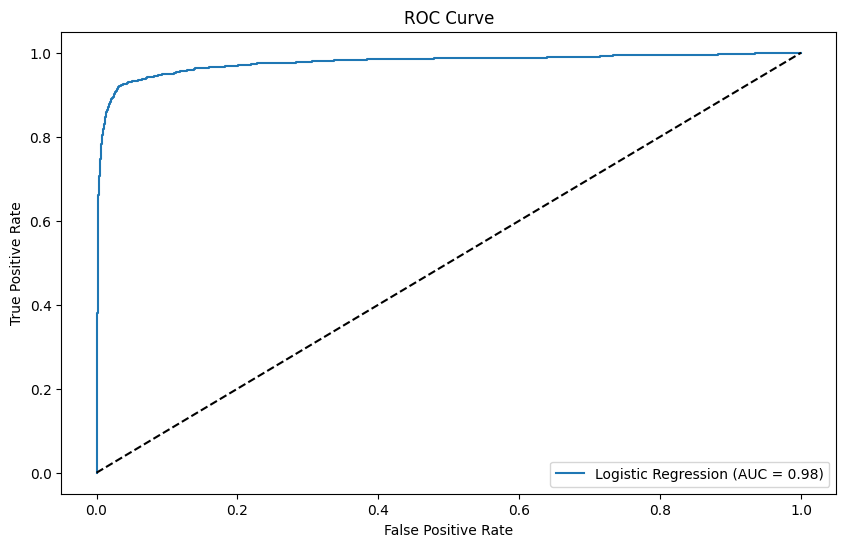

In [28]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Calculate the ROC curve for the LogisticRegression model
logistic_probs = logisticRegr.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, logistic_probs)
logistic_auc = roc_auc_score(y_test, logistic_probs)

# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(logistic_fpr, logistic_tpr, label=f'Logistic Regression (AUC = {logistic_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random classifier
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


### Now find the roc_auc_score for each. 

In [29]:
from sklearn.metrics import roc_auc_score

# Calculate ROC AUC score for the LogisticRegression model
logistic_auc = roc_auc_score(y_test, logistic_probs)

# Print ROC AUC score for the LogisticRegression model
print("Logistic Regression ROC AUC Score:", logistic_auc)


Logistic Regression ROC AUC Score: 0.9763298036332628


### What does this metric tell you? Which classifier works better with this metric in mind?

In [ ]:
# The high ROC AUC score indicates that the Logistic Regression model has a strong ability to distinguish between the two classes. 